In [5]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import yfinance as yf
import pandas_ta as ta
data = yf.download(tickers = 'MSFT', start = '2013-01-28',end = '2023-01-29')
data.head(10)
#data.tail(10)

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2013-01-28,28.010000,28.230000,27.760000,27.910000,22.769438,56056500
2013-01-29,27.820000,28.129999,27.600000,28.010000,22.851015,49242600
2013-01-30,28.010000,28.190001,27.760000,27.850000,22.720490,43580500
2013-01-31,27.790001,27.969999,27.400000,27.450001,22.394161,50530000
2013-02-01,27.670000,28.049999,27.549999,27.930000,22.785749,55565900
2013-02-04,27.870001,28.020000,27.420000,27.440001,22.386002,50540000
2013-02-05,27.620001,27.660000,27.360001,27.500000,22.434946,35410400
2013-02-06,27.379999,27.540001,27.250000,27.340000,22.304420,41889600
2013-02-07,27.350000,27.389999,27.100000,27.280001,22.255474,38028300


In [6]:
#Adicionando indicadores

data['RSI']=ta.rsi(data.Close, length=15)
data['EMAF']=ta.ema(data.Close, length=20)
data['EMAM']=ta.ema(data.Close, length=100)
data['EMAS']=ta.ema(data.Close, length=150)

data['Target'] = data['Adj Close']-data.Open
data['Target'] = data['Target'].shift(-1)

data['TargetClass'] = [1 if data.Target[i]>0 else 0 for i in range(len(data))]

data['TargetNextClose'] = data['Adj Close'].shift(-1)

data.dropna(inplace=True)
data.reset_index(inplace = True)
data.drop(['Volume', 'Close', 'Date'], axis=1, inplace=True)

In [8]:
data_set = data.iloc[:, 0:11]#.values
pd.set_option('display.max_columns', None)

data_set.head(30)

,Open,High,Low,Adj Close,RSI,EMAF,EMAM,EMAS,Target,TargetClass,TargetNextClose
0,32.930000,33.599998,32.799999,27.986597,55.068244,32.791399,32.115933,31.458200,-5.508520,0,27.861479
1,33.369999,33.480000,33.090000,27.861479,53.942624,32.849362,32.141360,31.483919,-5.156473,0,26.593527
2,31.750000,32.070000,31.290001,26.593527,44.145476,32.757041,32.136184,31.489165,-5.363710,0,26.026289
3,31.389999,31.469999,31.110001,26.026289,40.610153,32.608752,32.117646,31.485335,-5.048695,0,26.051306
4,31.100000,31.440001,30.950001,26.051306,40.834115,32.477442,32.100069,31.481953,-5.325417,0,25.984583
5,31.309999,31.389999,31.129999,25.984583,40.398825,32.351019,32.081256,31.477557,-4.809986,0,26.410013
6,31.219999,31.790001,31.200001,26.410013,44.443943,32.285208,32.072914,31.479973,-4.881048,0,27.018951
7,31.900000,32.400002,31.790001,27.018951,49.681398,32.295188,32.079193,31.492027,-5.259077,0,27.310923
8,32.570000,32.930000,32.529999,27.310923,52.005688,32.337551,32.092278,31.508556,-5.450792,0,27.269209
9,32.720001,32.779999,32.590000,27.269209,51.640563,32.371117,32.104114,31.524204,-5.217173,0,27.552828


In [9]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range=(0,1))
data_set_scaled = sc.fit_transform(data_set)
print(data_set_scaled)

[[5.83694806e-03 6.94356852e-03 5.94376998e-03 ... 4.20177625e-01
  0.00000000e+00 6.04805053e-03]
 [7.24036294e-03 6.56654537e-03 6.87549979e-03 ... 4.29310018e-01
  0.00000000e+00 1.96224186e-03]
 [2.07323179e-03 2.13648446e-03 1.09236993e-03 ... 4.23934110e-01
  0.00000000e+00 1.34392382e-04]
 ...
 [6.74279163e-01 6.67839601e-01 6.73060222e-01 ... 6.55813652e-01
  1.00000000e+00 6.83369287e-01]
 [6.48698644e-01 6.65797393e-01 6.42409593e-01 ... 6.07602863e-01
  1.00000000e+00 7.06929662e-01]
 [6.77947171e-01 6.81538232e-01 6.78072262e-01 ... 4.73185178e-01
  0.00000000e+00 7.07439795e-01]]


In [11]:
# multiple feature from data provided to the model
X = []
#print(data_set_scaled[0].size)
#data_set_scaled=data_set.values
backcandles = 10
print(data_set_scaled.shape[0])
for j in range(8):#data_set_scaled[0].size):#2 columns are target not X
    X.append([])
    for i in range(backcandles, data_set_scaled.shape[0]):#backcandles+2
        X[j].append(data_set_scaled[i-backcandles:i, j])

#move axis from 0 to position 2
X=np.moveaxis(X, [0], [2])

#Erase first elements of y because of backcandles to match X length
#del(yi[0:backcandles])
#X, yi = np.array(X), np.array(yi)
# Choose -1 for last column, classification else -2...
X, yi =np.array(X), np.array(data_set_scaled[backcandles:,-1])
y=np.reshape(yi,(len(yi),1))
#y=sc.fit_transform(yi)
#X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
print(X)
print(X.shape)
print(y)
print(y.shape)

2369
[[[5.83694806e-03 6.94356852e-03 5.94376998e-03 ... 1.67530277e-03
   1.51688477e-04 0.00000000e+00]
  [7.24036294e-03 6.56654537e-03 6.87549979e-03 ... 1.86713529e-03
   2.41347007e-04 9.41547921e-05]
  [2.07323179e-03 2.13648446e-03 1.09236993e-03 ... 1.56159041e-03
   2.23097816e-04 1.13360060e-04]
  ...
  [2.55166895e-03 3.17331309e-03 2.69879557e-03 ... 3.30305718e-05
   2.21400993e-05 1.23834276e-04]
  [4.68869398e-03 4.83850964e-03 5.07629866e-03 ... 1.73236764e-04
   6.82802623e-05 1.84346561e-04]
  [5.16713724e-03 4.36722172e-03 5.26907415e-03 ... 2.84328928e-04
   1.10015357e-04 2.41632791e-04]]

 [[7.24036294e-03 6.56654537e-03 6.87549979e-03 ... 1.86713529e-03
   2.41347007e-04 9.41547921e-05]
  [2.07323179e-03 2.13648446e-03 1.09236993e-03 ... 1.56159041e-03
   2.23097816e-04 1.13360060e-04]
  [9.24977714e-04 2.51350761e-04 5.14055716e-04 ... 1.07080825e-03
   1.57729939e-04 9.93389379e-05]
  ...
  [4.68869398e-03 4.83850964e-03 5.07629866e-03 ... 1.73236764e-04
   6.

In [12]:
# Treino 80%  e teste 20%
splitlimit = int(len(X)*0.8)
print(splitlimit)
X_train, X_test = X[:splitlimit], X[splitlimit:]
y_train, y_test = y[:splitlimit], y[splitlimit:]
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)
print(y_train)

1887
(1887, 10, 8)
(472, 10, 8)
(1887, 1)
(472, 1)
[[0.00443523]
 [0.00478468]
 [0.00583298]
 ...
 [0.66074102]
 [0.65640855]
 [0.6534573 ]]


In [13]:
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dropout
from keras.layers import Dense
from keras.layers import TimeDistributed

import tensorflow as tf
import keras
from keras import optimizers
from keras.callbacks import History
from keras.models import Model
from keras.layers import Dense, Dropout, LSTM, Input, Activation, concatenate
import numpy as np
#tf.random.set_seed(20)
np.random.seed(10)

lstm_input = Input(shape=(backcandles, 8), name='lstm_input')
inputs = LSTM(150, name='first_layer')(lstm_input)
inputs = Dense(1, name='dense_layer')(inputs)
output = Activation('linear', name='output')(inputs)
model = Model(inputs=lstm_input, outputs=output)
adam = optimizers.Adam()
model.compile(optimizer=adam, loss='mse')
model.fit(x=X_train, y=y_train, batch_size=15, epochs=30, shuffle=True, validation_split = 0.1)

Epoch 1/30
114/114 ━━━━━━━━━━━━━━━━━━━━ 4s 14ms/step - loss: 0.0042 - val_loss: 3.8979e-04
Epoch 2/30
114/114 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 6.8039e-05 - val_loss: 3.8019e-04
Epoch 3/30
114/114 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 6.8478e-05 - val_loss: 0.0011
Epoch 4/30
114/114 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 6.2242e-05 - val_loss: 5.9493e-04
Epoch 5/30
114/114 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 9.8073e-05 - val_loss: 3.9297e-04
Epoch 6/30
114/114 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 6.0177e-05 - val_loss: 4.0973e-04
Epoch 7/30
114/114 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 5.0714e-05 - val_loss: 3.3651e-04
Epoch 8/30
114/114 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 6.1310e-05 - val_loss: 6.8390e-04
Epoch 9/30
114/114 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 6.8125e-05 - val_loss: 9.0873e-04
Epoch 10/30
114/114 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 6.6187e-05 - val_loss: 9.9890e-04
Epoch 11/30
114/114 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - l

In [14]:
y_pred = model.predict(X_test)
#y_pred=np.where(y_pred > 0.43, 1,0)
for i in range(10):
    print(y_pred[i], y_test[i])

15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step
[0.66417885] [0.66256201]
[0.6609345] [0.66045839]
[0.6680078] [0.64061675]
[0.6676316] [0.63945517]
[0.6536888] [0.65716197]
[0.64913136] [0.6621538]
[0.6589214] [0.65549803]
[0.6698467] [0.64570274]
[0.6685821] [0.65870034]
[0.6605023] [0.65480735]


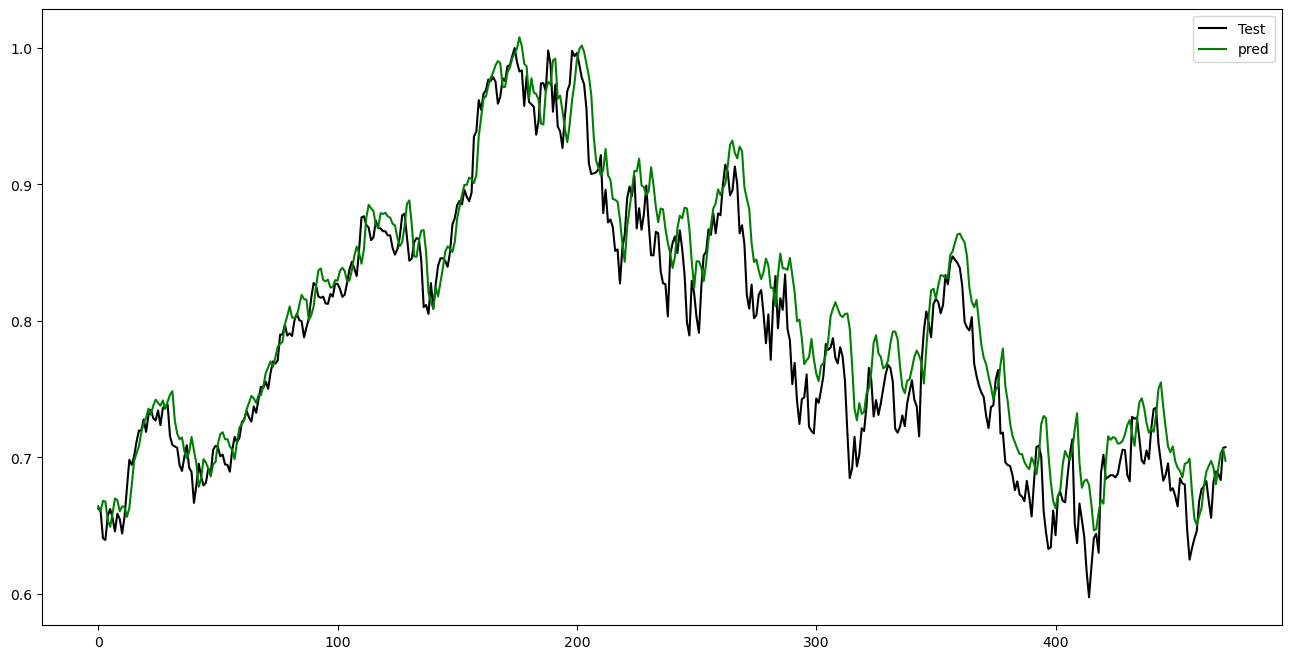

In [15]:
plt.figure(figsize=(16,8))
plt.plot(y_test, color = 'black', label = 'Test')
plt.plot(y_pred, color = 'green', label = 'pred')
plt.legend()
plt.show()

In [21]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_pred,X_test)
MatrizDeConfusao = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['TargetNextClose', 'Target'])

MatrizDeConfusao.plot();

ValueError: Classification metrics can't handle a mix of continuous and unknown targets